Import

In [64]:
import random
import time

from datetime import timedelta, datetime

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.optimize import curve_fit
from tabulate import tabulate

Fungsi Rekursif

In [65]:
def is_viable_Aktivitas_Rekursif(Jadwal, AktL, AktL_End, AktL_Start, index=0):
    if index >= len(Jadwal):
        return True
    AktJ = Jadwal[index]
    AktJ_Start = int(AktJ["Waktu Mulai"].split(":")[0]) * 60 + int(AktJ["Waktu Mulai"].split(":")[1])
    AktJ_End = int(AktJ["Waktu Selesai"].split(":")[0]) * 60 + int(AktJ["Waktu Selesai"].split(":")[1])
    if AktL["Hari"] == AktJ["Hari"]:
        if not (AktL_End <= AktJ_Start or AktL_Start >= AktJ_End):
            return False
    return is_viable_Aktivitas_Rekursif(Jadwal, AktL, AktL_End, AktL_Start, index + 1)

def nonOverlappingSchedule_Rekursif(List, Jadwal, index=0, List_Viable=None):
    if List_Viable is None:
        List_Viable = []
    if index >= len(List):
        return List_Viable
    AktL = List[index]
    AktL_Start = int(AktL["Waktu Mulai"].split(":")[0]) * 60 + int(AktL["Waktu Mulai"].split(":")[1])
    AktL_End = int(AktL["Waktu Selesai"].split(":")[0]) * 60 + int(AktL["Waktu Selesai"].split(":")[1])
    if is_viable_Aktivitas_Rekursif(Jadwal, AktL, AktL_End, AktL_Start):
        List_Viable.append(AktL)
    return nonOverlappingSchedule_Rekursif(List, Jadwal, index + 1, List_Viable)

Fungsi Iteratif

In [66]:
def is_viable_Aktivitas_Iteratif(Jadwal, AktL, AktL_End, AktL_Start):
    for AktJ in Jadwal:
        AktJ_Start = int(AktJ["Waktu Mulai"].split(":")[0]) * 60 + int(AktJ["Waktu Mulai"].split(":")[1])
        AktJ_End = int(AktJ["Waktu Selesai"].split(":")[0]) * 60 + int(AktJ["Waktu Selesai"].split(":")[1])
        if AktL["Hari"] == AktJ["Hari"]:
            if not (AktL_End <= AktJ_Start or AktL_Start >= AktJ_End):
                return False
    return True

def nonOverlappingSchedule_Iteratif(List, Jadwal):
    List_Viable = []
    for AktL in List:
        AktL_Start = int(AktL["Waktu Mulai"].split(":")[0]) * 60 + int(AktL["Waktu Mulai"].split(":")[1])
        AktL_End = int(AktL["Waktu Selesai"].split(":")[0]) * 60 + int(AktL["Waktu Selesai"].split(":")[1])
        if is_viable_Aktivitas_Iteratif(Jadwal, AktL, AktL_End, AktL_Start):
            List_Viable.append(AktL)
    return List_Viable

Dataset

In [67]:
computer_science_courses = [
    "AGAMA ISLAM", "ALGORITMA DAN PEMROGRAMAN 1", "TEORI BAHASA DAN AUTOMATA", 
    "SISTEM OPERASI", "STRUKTUR DATA", "ANALISIS KOMPLEKSITAS ALGORITMA", 
    "ANALISIS JEJARING SOSIAL", "ANALISIS DAN PERANCANGAN PERANGKAT LUNAK", 
    "ORGANISASI DAN ARSITEKTUR KOMPUTER", "BAHASA INGGRIS", "BAHASA INDONESIA", 
    "INTERAKSI MANUSIA KOMPUTER", "DESAIN INTERAKSI", "FORENSIK DIGITAL", "GENERATIVE AI", 
    "IMPLEMENTASI DAN PENGUJIAN PERANGKAT LUNAK", "MATRIKS DAN RUANG VEKTOR", 
    "IOT DENGAN KEMAMPUAN CERDAS", "KALKULUS", "KEAMANAN SIBER", "KECERDASAN ARTIFISIAL", 
    "KOMPUTASI AWAN DAN TERDISTRIBUSI", "KOMPUTASI PARALEL", "LOGIKA MATEMATIKA", 
    "MANAJEMEN PROJEK TIK", "MATEMATIKA DISKRIT", "SISTEM BASIS DATA", "TEORI PELUANG", 
    "SISTEM KEAMANAN CERDAS", "SISTEM MULTI AGEN", "PANCASILA", "PEMBELAJARAN MESIN", 
    "PEMROGRAMAN BERORIENTASI OBJEK", "PENDIDIKAN KARAKTER", "PENGOLAHAN BAHASA ALAMI", 
    "PENGOLAHAN CITRA DIGITAL", "PENULISAN PROPOSAL", "PROCESS MINING", 
    "REPRESENTASI PENGETAHUAN", "SWARM AND EVOLUTIONARY COMPUTATION", "TATA TULIS ILMIAH", 
    "VERIFIKASI DAN VALIDASI PERANGKAT LUNAK", "VISI KOMPUTER", "VISUALISASI DATA", 
    "WRAP RESEARCHSHIP HUMIC1: APLIKASI BERBASIS WEB UNTUK TELEMEDICINE", 
    "WRAP RESEARCHSHIP HUMIC2: APLIKASI BERBASIS SELULER UNTUK TELEMEDICINE", 
    "WRAP RESEARCHSHIP HUMIC3: KECERDASAN BUATAN TERAPAN DALAM TELEMEDICINE"
]

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

Jadwal = Jadwal = [
    {
        "Hari": "Wednesday",
        "Nama Aktivitas": "STRUKTUR DATA",
        "Waktu Mulai": "15:30",
        "Waktu Selesai": "18:30",
    },
    {
        "Hari": "Saturday",
        "Nama Aktivitas": "STRUKTUR DATA",
        "Waktu Mulai": "13:30",
        "Waktu Selesai": "15:30",
    },
    {
        "Hari": "Wednesday",
        "Nama Aktivitas": "SISTEM BASIS DATA",
        "Waktu Mulai": "12:30",
        "Waktu Selesai": "15:30",
    },
    {
        "Hari": "Tuesday",
        "Nama Aktivitas": "ORGANISASI DAN ARSITEKTUR KOMPUTER",
        "Waktu Mulai": "09:30",
        "Waktu Selesai": "12:30",
    },
    {
        "Hari": "Thursday",
        "Nama Aktivitas": "ANALISIS KOMPLEKSITAS ALGORITMA",
        "Waktu Mulai": "09:30",
        "Waktu Selesai": "11:30",
    },
    {
        "Hari": "Friday",
        "Nama Aktivitas": "TEORI BAHASA DAN AUTOMATA",
        "Waktu Mulai": "09:30",
        "Waktu Selesai": "11:30",
    },
    {
        "Hari": "Monday",
        "Nama Aktivitas": "TEORI PELUANG",
        "Waktu Mulai": "07:30",
        "Waktu Selesai": "10:30",
    },
    {
        "Hari": "Friday",
        "Nama Aktivitas": "STRUKTUR DATA",
        "Waktu Mulai": "07:30",
        "Waktu Selesai": "09:30",
    }
]

Running Algoritma

In [68]:
dataset_sizes = list(range(1, 1001, 1))
Rekursif_execution_times = []
Iteratif_execution_times = []

for size in dataset_sizes:
    List_Kegiatan = []

    for _ in range(size):
        random_day = random.choice(days_of_week)
        random_activity = random.choice(computer_science_courses)
        
        start_hour = random.randint(8, 17)
        start_minute = 30
        duration = random.randint(1, 5)
        end_hour = start_hour + duration
        end_minute = start_minute
        
        List_Kegiatan.append({
            "Hari": random_day,
            "Nama Aktivitas": random_activity,
            "Waktu Mulai": f"{start_hour:02}:{start_minute:02}",
            "Waktu Selesai": f"{end_hour:02}:{end_minute:02}",
        })
        
    start_time = time.time()
    List_Viable_Aktivitas_Rekursif = nonOverlappingSchedule_Rekursif(List_Kegiatan, Jadwal)
    end_time = time.time()
    Rekursif_execution_times.append(end_time - start_time)

    start_time = time.time()
    List_Viable_Kegiatan_Iteratif = nonOverlappingSchedule_Iteratif(List_Kegiatan, Jadwal)
    end_time = time.time()
    Iteratif_execution_times.append(end_time - start_time)
    
    if List_Viable_Aktivitas_Rekursif != List_Viable_Kegiatan_Iteratif:
        print("Different Results")
        break
    
results_df = pd.DataFrame({
    'Jumlah Aktivitas': dataset_sizes,
    'Waktu Algoritma Rekursif': Rekursif_execution_times,
    'Waktu Algoritma Iteratif': Iteratif_execution_times
})

Visualisasi

Dataframe

In [69]:
display(results_df)

,Jumlah Aktivitas,Waktu Algoritma Rekursif,Waktu Algoritma Iteratif
0,1,0.000000,0.001440
1,2,0.000000,0.000000
2,3,0.000000,0.000000
3,4,0.000626,0.000000
4,5,0.000000,0.000000
...,...,...,...
995,996,0.021452,0.018588
996,997,0.019783,0.017935
997,998,0.019303,0.018198
998,999,0.019041,0.018139


Plot

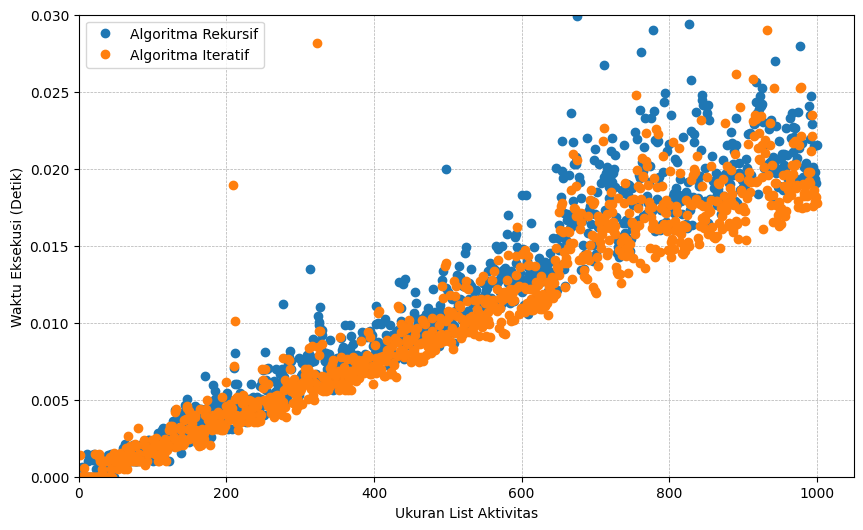

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, Rekursif_execution_times, 'o', label="Algoritma Rekursif")
plt.plot(dataset_sizes, Iteratif_execution_times, 'o', label="Algoritma Iteratif")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Ukuran List Aktivitas")
plt.ylabel("Waktu Eksekusi (Detik)")
plt.ylim(0, 0.03)
plt.xlim(0)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

Fungsi

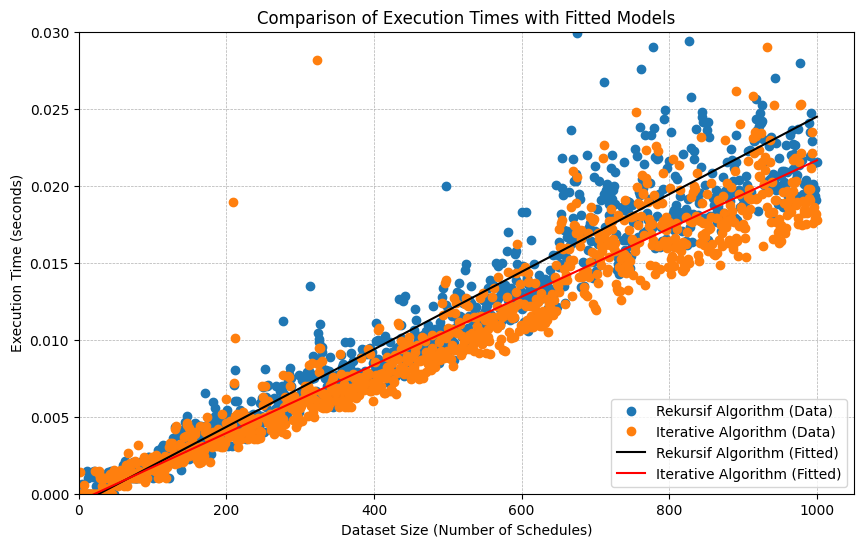

Rekursif Algorithm Function: T(n) = 0.000025 * n + -0.000692
Iterative Algorithm Function: T(n) = 0.000022 * n + -0.000490


In [71]:
def linear_model(x, a, b):
    return a * x + b

popt_Rekursif, _ = curve_fit(linear_model, dataset_sizes, Rekursif_execution_times)
popt_iterative, _ = curve_fit(linear_model, dataset_sizes, Iteratif_execution_times)

Rekursif_fitted = linear_model(np.array(dataset_sizes), *popt_Rekursif)
iterative_fitted = linear_model(np.array(dataset_sizes), *popt_iterative)

plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, Rekursif_execution_times, 'o', label="Rekursif Algorithm (Data)")
plt.plot(dataset_sizes, Iteratif_execution_times, 'o', label="Iterative Algorithm (Data)")
plt.plot(dataset_sizes, Rekursif_fitted, label="Rekursif Algorithm (Fitted)", color='black')
plt.plot(dataset_sizes, iterative_fitted, label="Iterative Algorithm (Fitted)", color='red')

plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Dataset Size (Number of Schedules)")
plt.ylabel("Execution Time (seconds)")
plt.title("Comparison of Execution Times with Fitted Models")
plt.ylim(0, 0.03)
plt.xlim(0)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

print(f"Rekursif Algorithm Function: T(n) = {popt_Rekursif[0]:.6f} * n + {popt_Rekursif[1]:.6f}")
print(f"Iterative Algorithm Function: T(n) = {popt_iterative[0]:.6f} * n + {popt_iterative[1]:.6f}")

Algoritma Iterasi dengan inputsize nJ dan nL range(1, 101, 1)

In [73]:
dataset_sizes = list(range(1, 1001, 1))
Iteratif_execution_times_Extended = []
Rekursif_execution_times_Extended = []

for size in dataset_sizes:
    
    List_Kegiatan = []
    for _ in range(size):
        random_day = random.choice(days_of_week)
        random_activity = random.choice(computer_science_courses)
        
        start_hour = random.randint(8, 17)
        start_minute = 30
        duration = random.randint(1, 5)
        end_hour = start_hour + duration
        end_minute = start_minute
        
        List_Kegiatan.append({
            "Hari": random_day,
            "Nama Aktivitas": random_activity,
            "Waktu Mulai": f"{start_hour:02}:{start_minute:02}",
            "Waktu Selesai": f"{end_hour:02}:{end_minute:02}",
        })
    
    Jadwal = []
    for _ in range(size):
        random_day = random.choice(days_of_week)
        random_activity = random.choice(computer_science_courses)
        
        start_hour = random.randint(8, 17)
        start_minute = 30
        duration = random.randint(1, 5)
        end_hour = start_hour + duration
        end_minute = start_minute
        
        Jadwal.append({
            "Hari": random_day,
            "Nama Aktivitas": random_activity,
            "Waktu Mulai": f"{start_hour:02}:{start_minute:02}",
            "Waktu Selesai": f"{end_hour:02}:{end_minute:02}",
        })

    start_time = time.time()
    List_Viable_Kegiatan_Iteratif_Extended = nonOverlappingSchedule_Iteratif(List_Kegiatan, Jadwal)
    end_time = time.time()
    Iteratif_execution_times_Extended.append(end_time - start_time)
        
    start_time = time.time()
    List_Viable_Aktivitas_Rekursif = nonOverlappingSchedule_Rekursif(List_Kegiatan, Jadwal)
    end_time = time.time()
    Rekursif_execution_times_Extended.append(end_time - start_time)

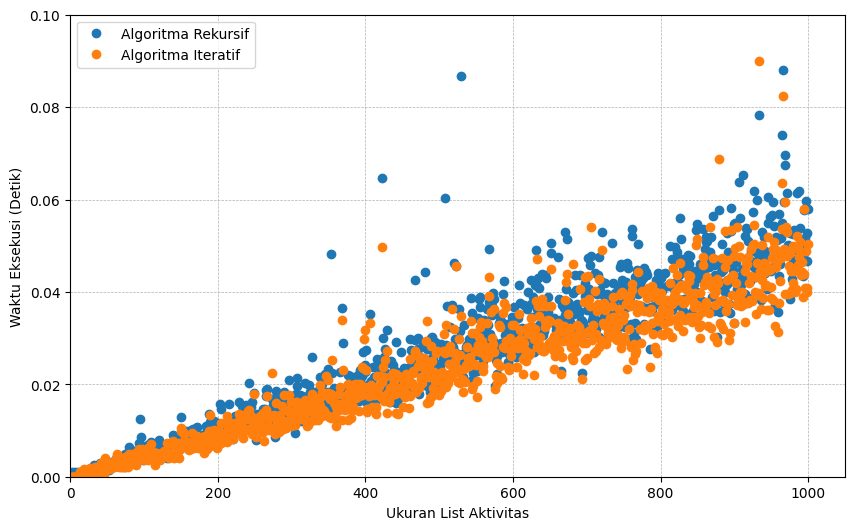

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, Rekursif_execution_times_Extended, 'o', label="Algoritma Rekursif")
plt.plot(dataset_sizes, Iteratif_execution_times_Extended, 'o', label="Algoritma Iteratif")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Ukuran List Aktivitas")
plt.ylabel("Waktu Eksekusi (Detik)")
plt.ylim(0, 0.1)
plt.xlim(0)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()